# Tarea 2 Yuriko Yamamoto

Como siempre, documenten **todo** lo que hacen en el notebook

Se recomienda que *colaboren* (equipos de máximo dos personas) en la tarea.

## 1. Histogramas

Usando la función `randn`, generen $N$ valores tipo `Float64` al azar ($N\sim 10000$, o mayor, es razonable). Construyan la función `histograma`, que regresa un vector de tamaño $n_{hist}$ (que es un argumento de la función) y que contiene el histograma de frecuencias *sin normalizar*. Esto es, la primer componente del vector corresponde al número de valores generados al azar que caen en el intervalo (llamado *bin* en inglés) $[x_0, x_1)$, los de la segunda componente caen en el intervalo $[x_1, x_2)$, etc, hasta $[x_{n_{hist}-1}, x{n_{hist}})$, donde el tamaño de los intervalos es el mismo y corresponde a $\Delta x = (\textrm{sup}(x)-\textrm{inf}(x))/n_{hist}$. (No escatimen en estética.)

Dibujen el histograma a partir de sus datos.

PyPlot (matplotlib) de hecho tiene [una función]() útil para dibujar histogramas a partir de los datos directamente. Utilizando esa función, muestren el histograma de sus datos. Debería ser muy parecida a la que ya obtuvieron antes.

NOTA: Hay esencialmente dos formas de hacerlo, que se distinguen por el número de veces que uno lee los datos. Traten de hacer su implementación usando *una* lectura de los datos. (Si no pueden, llevarán sobre sus hombros esa carga toda su vida.)

In [64]:
#Generando N valores aleatorios de tipo Float64
N = 20000
x = randn(N)

20000-element Array{Float64,1}:
  0.247727 
 -1.21649  
 -1.27707  
  1.04797  
 -2.41958  
 -0.390412 
  0.593808 
 -0.0577089
  1.09755  
 -1.67474  
 -0.545846 
 -0.0727651
  1.42463  
  ⋮        
 -1.11169  
  1.15122  
  0.391614 
  0.611109 
 -2.46062  
 -0.896755 
 -0.989192 
 -0.803845 
  0.918255 
  2.88312  
 -0.012249 
 -0.620833 

In [2]:
#Comprobando que el arreglo tiene N elementos
length(x)

20000

In [65]:
#Encontrando el mínimo del arreglo
xinf = minimum(x)

#Encontrando el máximo del arreglo
xsup = maximum(x)

#Encontrando el tamaño Δx de los s subintervalos 
s = 10
Δx = (xsup - xinf)/s

print("Δx = ",Δx, " xinf = ", xinf, " xsup = ", xsup) 
    

Δx = 0.8465996169840121 xinf = -4.5565043386813 xsup = 3.9094918311588205

In [66]:
#Definiendo la función histograma
function histograma(num::Array, nhist::Int)
    
    #Calculando el mínimo y máximo del conjunto de números aleatrorios x.
    xinf = minimum(num)
    xsup = maximum(num)
    
    #Calculando el tamaño de los nhist intervalos Δx (bin).
    Δx = (xsup - xinf) / nhist
    #print("Δx = ",Δx, " xinf = ", xinf, " xsup = ", xsup) 
    
    #Creando el arreglo de frecuencias e iniciándolos en cero.
    frecs = zeros(nhist)
    
    #Ciclo para llevar el conteo de números aleatorios en cada intervalo.
    for i in num
        a = xinf 
        b = xinf + Δx
        
        for j in 1:nhist
            if i >= a && i < b
                frecs[j] = frecs[j] + 1
                
            end 
            
            a = a + Δx
            b = b + Δx
        end
        
        if i == xsup
            frecs[nhist] = frecs[nhist] + 1
        end
    end    
    return frecs 
end

histograma (generic function with 1 method)

In [67]:
#Evaluando la función histograma
frqs = histograma(x,30)

30-element Array{Float64,1}:
    1.0
    0.0
    1.0
    5.0
    8.0
   30.0
   59.0
  115.0
  203.0
  384.0
  654.0
  991.0
 1283.0
    ⋮  
 1817.0
 1430.0
 1104.0
  734.0
  426.0
  257.0
  149.0
   74.0
   26.0
   12.0
    5.0
    3.0

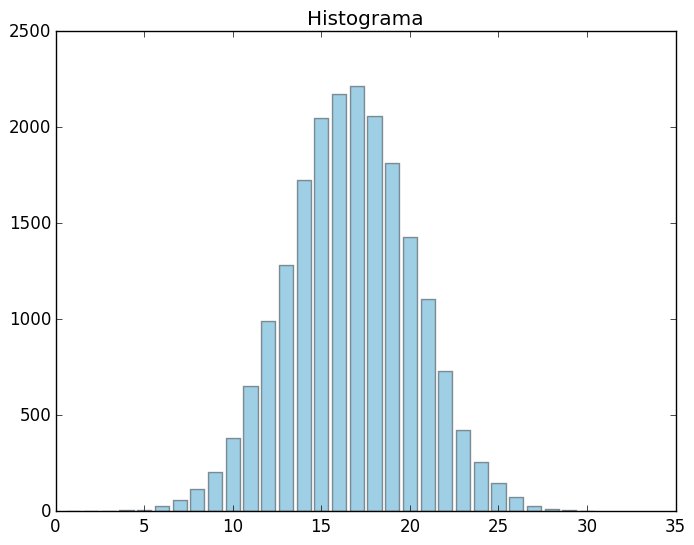

PyObject <matplotlib.text.Text object at 0x313066190>

In [68]:
#Graficando Histograma
using PyPlot

h = bar(1:30, frqs, color="#0f87bf",align="center",alpha=0.4)

title("Histograma")
#xlabel("Bin")
#ylabel("Frecuencia")


In [70]:
#Usando la función histograma de Julia 
j = hist(x, linspace(-4.9, 3.8, 31))

(linspace(-4.9,3.8,31),[0,1,0,1,3,10,30,60,117,212  …  1335,991,638,346,203,111,44,19,3,5])

In [71]:
typeof(j)

Tuple{LinSpace{Float64},Array{Int64,1}}

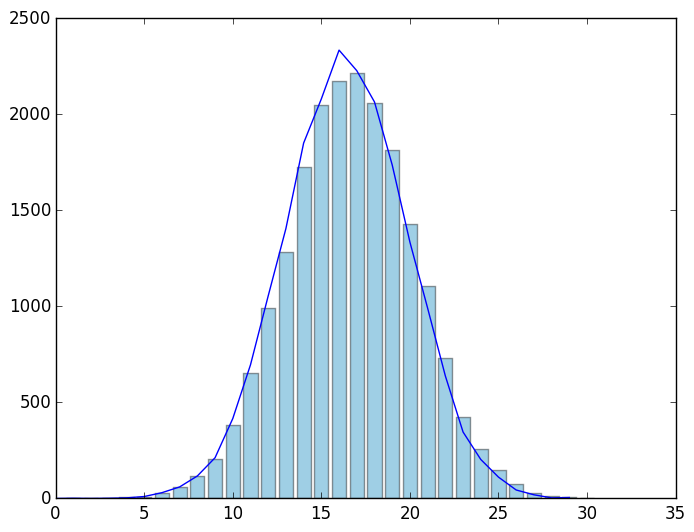

(PyObject <matplotlib.patches.Rectangle object at 0x3177d2850>,PyObject <matplotlib.patches.Rectangle object at 0x3177d2d50>,PyObject <matplotlib.patches.Rectangle object at 0x31771c410>,PyObject <matplotlib.patches.Rectangle object at 0x31771ca90>,PyObject <matplotlib.patches.Rectangle object at 0x31771cf90>,PyObject <matplotlib.patches.Rectangle object at 0x31772b7d0>,PyObject <matplotlib.patches.Rectangle object at 0x31772be50>,PyObject <matplotlib.patches.Rectangle object at 0x317739510>,PyObject <matplotlib.patches.Rectangle object at 0x317739b90>,PyObject <matplotlib.patches.Rectangle object at 0x317746250>,PyObject <matplotlib.patches.Rectangle object at 0x3177468d0>,PyObject <matplotlib.patches.Rectangle object at 0x317746f50>,PyObject <matplotlib.patches.Rectangle object at 0x317fa8610>,PyObject <matplotlib.patches.Rectangle object at 0x317fa8c90>,PyObject <matplotlib.patches.Rectangle object at 0x317fb5350>,PyObject <matplotlib.patches.Rectangle object at 0x317fb59d0>,PyObjec

In [72]:
#Graficando el histograma de Julia con una línea continua azul y el de la función que se creó con un histograma. 
#Así se puede comparar ambas funciones que aunque no dan exactamente el mismo resultado, son similares.
plot(j[2])

h = bar(1:30, frqs, color="#0f87bf",align="center",alpha=0.4)

## 2. Promedio y varianza

(a) Siguiendo con la generación de datos del ejercicio anterior, hagan una subrutina que calcule el promedio y la varianza de los datos generados anteriormente. Comparen su resultado con lo que se obtiene al utilizar `mean` y `var` (que son las funciones nativas de julia que hacen eso).
    
(b) Existe un [algoritmo recursivo](https://en.wikipedia.org/wiki/Algorithms_for_calculating_variance#Online_algorithm), ampliamente desconocido, que permite calcular el promedio y la varianza con una sóla lectura de los datos. Impleméntenlo. La *misma* función debería de darles *ambos* valores.
    
(c) ¿Cuál de todos los algoritmos es el más rápido? Consideren esto para datos de distinta longitud, cubriendo varios órdenes de magnitud.


In [18]:
#Definiendo la función promedio
function promedioy(p)
    
    #Iniciando el contador suma en cero (Float64)
    suma = 0.0
    
    #Ciclo para obtener la suma de todos los números aleatorios
    for xi in p
        suma = suma + xi
    end
    
    #Dividiendo la suma entre el número de números aleatorios que tenemos
    prom = suma/length(p)
    
    return prom
end

promedioy (generic function with 1 method)

In [19]:
#Evaluando la función promedioy
promedioy(x)

0.00323949888533693

In [21]:
#Se obtiene el valor promedio con la función mean de Julia
mean(x)

0.0032394988853369534

In [22]:
#Tiempo de la función promedioy
@time promedioy(x)

0.00323949888533693

0.000031 seconds (149 allocations: 10.167 KB)


In [23]:
#Tiempo de la función mean 
@time mean(x)

0.0032394988853369534

0.000017 seconds (5 allocations: 176 bytes)


In [25]:
#Definiendo la función varianza
function varianzay(v)
    
    #Iniciando el contador suma en cero (Float64)
    suma = 0.0
   
    #Ciclo para obtener la suma del cuadrado de los números aleatorios
    for vi in v
        suma = suma + (vi^2)
    end
    
    
    d = suma/length(v)
    
    prom = promedioy(v)
    
    var1 = d - prom^2
    
    return var1
end

varianzay (generic function with 1 method)

In [26]:
#Evaluando la función varianzay
varianzay(x)

0.9962366239536855

In [27]:
#Se obtiene el valor de la varianza con la función var de Julia
var(x)

0.996286438275592

In [28]:
#Tiempo de la función varianzay 
@time varianzay(x)

0.9962366239536855

0.000050 seconds (5 allocations: 176 bytes)


In [29]:
#Tiempo de la función var 
@time var(x)

0.996286438275592

0.000045 seconds (8 allocations: 288 bytes)


In [51]:
#Definiendo la función alg_recursivo (algoritmo recursivo)
function alg_recursivo(data)
    n = 0
    mean1 = 0.0
    M2 = 0.0
     
    for x in data
        n += 1
        delta = x - mean1
        mean1 += delta/n
        M2 += delta*(x - mean1)
    end
    
    #Devuelve el valor del promedio y varianza
    return (mean1, M2 / (n - 1))
end

alg_recursivo (generic function with 1 method)

In [52]:
#Evaluando la función del algoritmo recursivo
alg_recursivo(x)

(0.0032394988853369417,0.9962864382755888)

In [32]:
#Tiempo de la función alg_recursivo
@time alg_recursivo(x)

(0.0032394988853369417,0.9962864382755888)

0.000190 seconds (5 allocations: 192 bytes)


## 3. Método de Simpson para integrar $f(x)$ en un intervalo

Implementen el método de Simpson para integrar una función arbitraria $f(x)$.

In [33]:
#Definir función F
f(t) = t^2+1

f (generic function with 1 method)

In [34]:
#Definiendo la función Integración de Simpson de la función 'F' definida de 'a' a 'b' con 'm' subintervalos.
function IntegracionSimpson(F, a, b, m)
    
    
    #Definiendo operaciones internas de la función F
    g = (b - a)/6.0
    h = F(a)
    p = 4 * (F((a + b)/2.0))
    q = F(b)
    
    #Aproximación de la integral.
    int =  g * (h + p + q)
    
    return int
end

IntegracionSimpson (generic function with 1 method)

In [35]:
#Prueba del Método de Simpson para integrar la función F
IntegracionSimpson(f, 0.0, 1.0, 5)

1.3333333333333333